De bas en haut : réflexion, rotation et rotoinversion


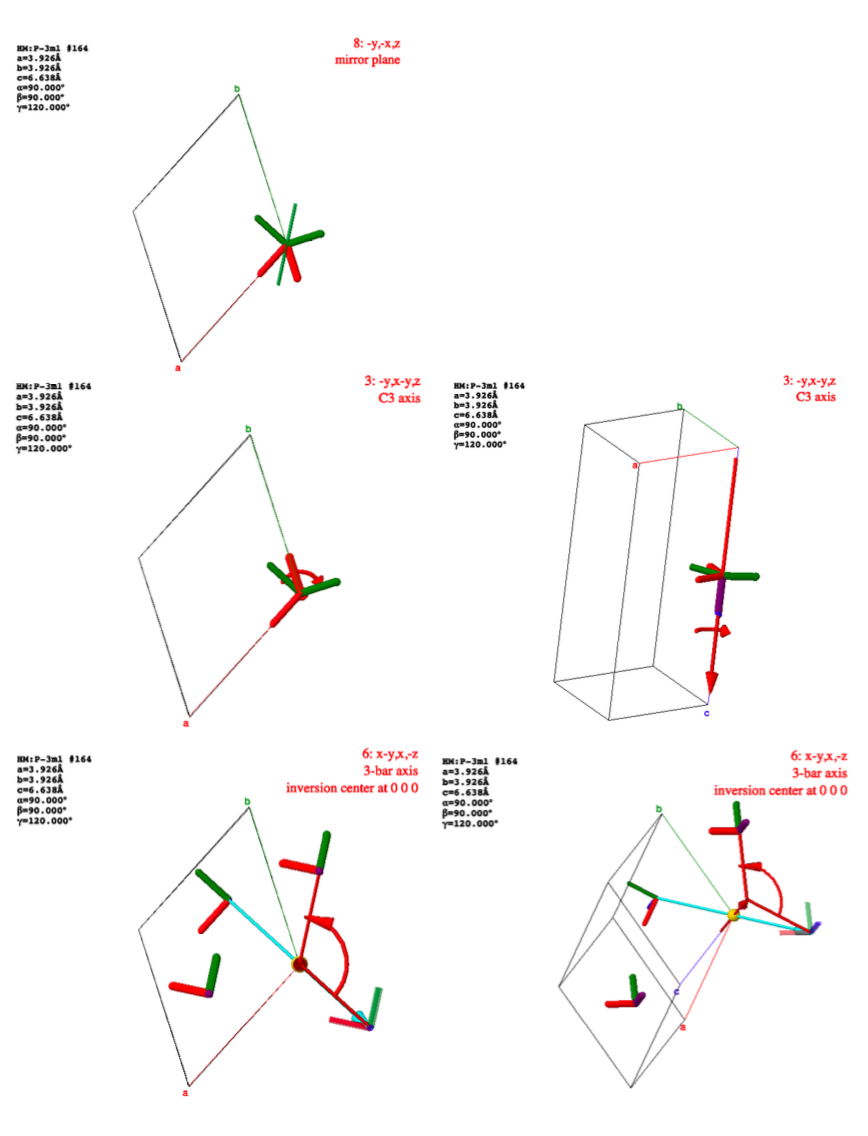

In [7]:
import numpy as np
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp
from IPython.display import Image

with MPRester("NrRTCZ9vfEUg8SJu") as m:
    #Téléchargement du fichier
    structure = m.get_structure_by_material_id("mp-12908")
    w = CifWriter(structure)
    w.write_file('ScAgSe2_mp-12908_symmetrized.cif')
    
#Permet d'obtenir les opérations de symétrie ponctuelle (identité, rotation, inversion, réflexion par rapport à un plan et roto-inversion). 
#Pour le Sc2AgSe, il y en a 12. 
sga = SpacegroupAnalyzer(structure, symprec=0.01, angle_tolerance=5)
a = sga.get_point_group_operations()

#Permet d'obtenir la position de l'atome après avoir appliqué l'opération de symétrie
#Pour chaque symétrie : 
#1. Construire la matrice de transformation affine à l'aide des matrices de rotation et d'inversion
#2. Construire l'opération de symétrie
#3. L'appliquer sur l'atome
#Symétrie 1 : Réflexion par rapport au plan de normale (-y,-x,z) appliquée sur le Sc en (0,0,0)
affine1 = [[0,-1,0,0],[-1,0,0,0],[0,0,1,0],[0,0,0,0]]
sym1 = SymmOp(affine1,tol=0.01)
p1 = sym1.operate([0,0,0])
#Symétrie 2 : Rotation d'ordre 3 appliquée sur le Ag en (0,0,0.5)
affine2 = [[0,-1,0,0],[1,-1,0,0],[0,0,1,0],[0,0,0,0]]
sym2 = SymmOp(affine2,tol=0.01)
p2 = sym2.operate([0,0,0.5])
#Symétrie 3 : Rotoinversion d'ordre 3 appliquée sur le Se en (0.33,0.67,0.23)
affine3 = [[1,-1,0,0],[1,0,0,0],[0,0,-1,0],[0,0,0,0]]
sym3 = SymmOp(affine3,tol=0.01)
p3 = sym3.operate([0.33,0.67,0.23])

#Téléchargement des images
print('De bas en haut : réflexion, rotation et rotoinversion')
Image(filename="Symetrie.png",width=700)